In [159]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

##Bounce Section

In [316]:
dataset= pd.read_csv('USA_Housing.csv')
dataset = dataset.drop(columns=["Address"])
price = dataset['Price']
dataset = dataset.drop(columns=["Price"])
dataset = preprocessing.normalize(dataset)
scaled_df = pd.DataFrame(dataset)
scaled_df['Price'] = price
scaled_df.head()

,0,1,2,3,4,Price
0,0.960369,0.000069,0.000085,0.000049,0.278732,1.059034e+06
1,0.891943,0.000068,0.000076,0.000035,0.452148,1.505891e+06
2,0.856814,0.000082,0.000119,0.000072,0.515625,1.058988e+06
3,0.879302,0.000100,0.000078,0.000045,0.476264,1.260617e+06
4,0.915529,0.000077,0.000120,0.000065,0.402252,6.309435e+05


In [290]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [291]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


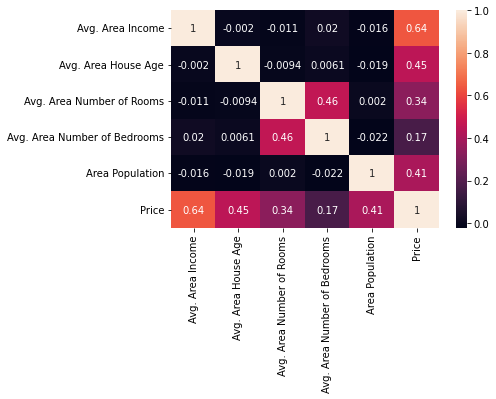

In [293]:
sns.heatmap(dataset.corr(), annot=True)

In [320]:
X = np.array(scaled_df.iloc[:,0:5])
Y = np.array(scaled_df['Price'])

In [321]:
X.shape

(5000, 5)

In [322]:
Y = Y.reshape(Y.shape[0],1)
Y.shape

(5000, 1)

##Generate 1000 random examples

In [327]:
np.random.seed(42)
X = np.random.rand(1000,3)
Y = np.dot(X,[5,3,1.5]) + 6 #Scalar values.
Y = Y.reshape(1000, 1) 

##Define a MSE function

In [328]:
def meanSquaredError(actual, predicted):
    s = ((actual-predicted)**2)
    cost = np.mean(s)
    return cost

##Define a gradient decent function

In [329]:
def gradient_decent_v2(x, y, num_iterations = 30 , learning_rate= 0.05 , Seed = 42):
   
    np.random.seed(Seed)
        
    x_weights = x.shape[1] #Number of weights 
    w, b = np.random.randn(x_weights).reshape(x_weights,1), np.random.randn(1)[0]

    parameters, losses = [], []
    for i in range(num_iterations):
      
      y_predicted = (np.dot(x,w) + b).reshape(y.shape[0],1) #(w.x^i + b) y_predicted = y_hat
      loss_eq =  y - y_predicted  # y(predicted)i - (w.x^i + b)
      w -= learning_rate * (-2 * np.dot(x.transpose(),loss_eq).sum() / len(x)) #N = len(x)
      b -= learning_rate * (-2 * loss_eq.sum() / len(x))
      parameters.append((w, b))
      loss = meanSquaredError(y, y_predicted) #Loss over iteration 
      losses.append(loss)
      print(f"After Iteration #{i+1}, Loss = {loss} ")
    return w, b, parameters, losses

##Split data into (Traning && Test data)

In [330]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

##Run GD function to calculate loss & find optimal parameters

In [331]:
w,b,parameters,losses = gradient_decent_v2(x_train, y_train) #Training the model

After Iteration #1, Loss = 80.68803498777675 
After Iteration #2, Loss = 34.808485861735484 
After Iteration #3, Loss = 15.335771541183949 
After Iteration #4, Loss = 7.068970439065309 
After Iteration #5, Loss = 3.5575010470760993 
After Iteration #6, Loss = 2.0640287850990617 
After Iteration #7, Loss = 1.426952436618958 
After Iteration #8, Loss = 1.153340470788448 
After Iteration #9, Loss = 1.0340144132868292 
After Iteration #10, Loss = 0.9802077104376233 
After Iteration #11, Loss = 0.9542511694163593 
After Iteration #12, Loss = 0.940159006966575 
After Iteration #13, Loss = 0.9311469042107794 
After Iteration #14, Loss = 0.92433523585272 
After Iteration #15, Loss = 0.9185013610658533 
After Iteration #16, Loss = 0.9131257976849649 
After Iteration #17, Loss = 0.9079874617097468 
After Iteration #18, Loss = 0.9029919051920761 
After Iteration #19, Loss = 0.8980984280573818 
After Iteration #20, Loss = 0.8932891475351387 
After Iteration #21, Loss = 0.8885558724951154 
After It

##Plot change in loss over iterations

Text(0, 0.5, 'Loss')

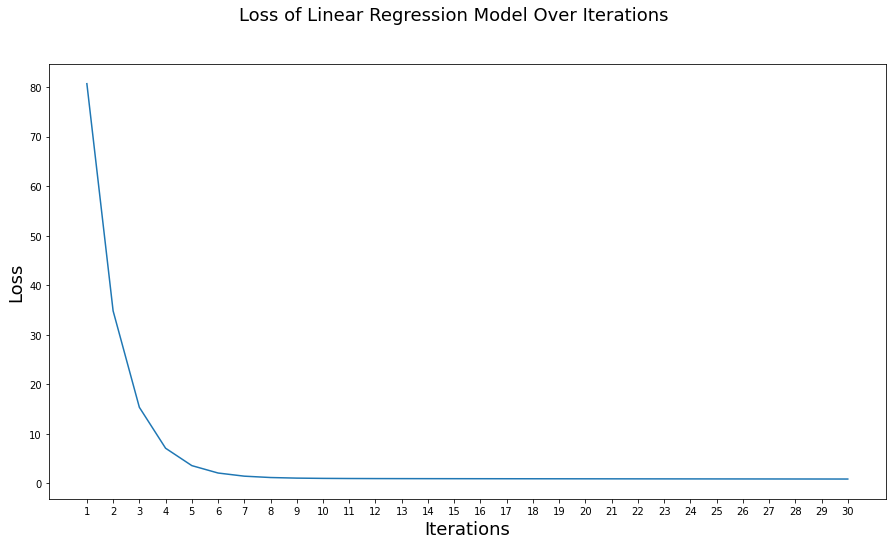

In [333]:
num_iterations = 30
plt.figure(figsize=(15,8))
plt.plot(np.arange(1,num_iterations + 1), losses)
plt.xticks(np.arange(1,num_iterations + 1))
plt.suptitle('Loss of Linear Regression Model Over Iterations', fontsize = 18)
plt.xlabel('Iterations', fontsize = 18)
plt.ylabel('Loss', fontsize = 18)

##Find (Traning loss && Optimal Paramerts && Test loss)

In [334]:
print(f"Model can predict (Truth Value Y) in (Training data) with error(MSE) : {np.round(losses[-1],2)}")

Model can predict (Truth Value Y) in (Training data) with error(MSE) : 0.85


In [335]:
print(f"Optimized values for weights (W1,W2,W3) {w[0][0],w[1][0],w[2][0]}, bias (b) {b}")

Optimized values for weights (W1,W2,W3) (4.328461035956734, 3.6934825817743184, 4.479435421046195), bias (b) 4.422791201572035


In [336]:
pred = (np.dot(x_test, w) + b).reshape(y_test.shape[0],1)
print(f"Model can predict (Truth Value Y) in (Test data) with error(MSE) : {np.round(meanSquaredError(y_test, pred),2)}")

Model can predict (Truth Value Y) in (Test data) with error(MSE) : 0.83
